# 1. Import Library 

In [51]:
import pandas as pd
import pyodbc
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# 2. Connection to SQL Server

In [53]:
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost\SQLEXPRESS;"
    "DATABASE=projects;"
    "Trusted_Connection=yes;"
    "TrustServerCertificate=yes;")

df = pd.read_sql_query(
'''                                        
SELECT *
FROM  [projects].[dbo].[Airline_Dataset_v2];                         
''', conn)
df

<>:3: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:3: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
C:\Users\Hiep\AppData\Local\Temp\ipykernel_20992\1117496288.py:3: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
  "SERVER=localhost\SQLEXPRESS;"
C:\Users\Hiep\AppData\Local\Temp\ipykernel_20992\1117496288.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(


,Passenger_ID,First_Name,Last_Name,Gender,Age,Nationality,Airport_Name,Airport_Country_Code,Country_Name,Airport_Continent,Continents,Departure_Date,Arrival_Airport,Pilot_Name,Flight_Status,snapshot_date
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time,2026-01-31
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time,2026-01-31
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time,2026-01-31
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Kacie Commucci,Delayed,2026-01-31
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Ebonee Tree,On Time,2026-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,2022-12-11,HAA,Pammie Kingscote,Cancelled,2026-01-31
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,2022-10-30,IVA,Dorice Lochran,Cancelled,2026-01-31
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,2022-09-10,ABC,Gearalt Main,On Time,2026-01-31
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,2022-10-26,GGN,Judon Chasle,Cancelled,2026-01-31


# 3. Preprocessing Data

In [54]:
df.shape

(98619, 16)

DataFrame has shape of 98619 rows and 15 columns.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger_ID          98619 non-null  object
 1   First_Name            98619 non-null  object
 2   Last_Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport_Name          98619 non-null  object
 7   Airport_Country_Code  98619 non-null  object
 8   Country_Name          98619 non-null  object
 9   Airport_Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure_Date        98619 non-null  object
 12  Arrival_Airport       98619 non-null  object
 13  Pilot_Name            98619 non-null  object
 14  Flight_Status         98619 non-null  object
 15  snapshot_date         98619 non-null

We observe that no missing data in data frame.

In [56]:
df.describe()

,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


The age distribution appears clear and reasonable, covering a broad range from infants to elderly passengers, which is consistent with airline passenger demographics.

# 4. Data Cleaning Process

In [57]:
# Remove duplicates
df = df.drop_duplicates()

# Convert date
df["Departure_Date"] = pd.to_datetime(df["Departure_Date"])

# Standardize text
df["Flight_Status"] = df["Flight_Status"].str.strip().str.title()

# Remove invalid age
df = df[df["Age"].between(0, 100)]

In [58]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger_ID          98619 non-null  object        
 1   First_Name            98619 non-null  object        
 2   Last_Name             98619 non-null  object        
 3   Gender                98619 non-null  object        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  object        
 6   Airport_Name          98619 non-null  object        
 7   Airport_Country_Code  98619 non-null  object        
 8   Country_Name          98619 non-null  object        
 9   Airport_Continent     98619 non-null  object        
 10  Continents            98619 non-null  object        
 11  Departure_Date        98619 non-null  datetime64[ns]
 12  Arrival_Airport       98619 non-null  object        
 13  Pilot_Name      

Passenger_ID            0
First_Name              0
Last_Name               0
Gender                  0
Age                     0
Nationality             0
Airport_Name            0
Airport_Country_Code    0
Country_Name            0
Airport_Continent       0
Continents              0
Departure_Date          0
Arrival_Airport         0
Pilot_Name              0
Flight_Status           0
snapshot_date           0
dtype: int64

In [59]:
df.columns = df.columns.str.lower()
df.columns

Index(['passenger_id', 'first_name', 'last_name', 'gender', 'age',
       'nationality', 'airport_name', 'airport_country_code', 'country_name',
       'airport_continent', 'continents', 'departure_date', 'arrival_airport',
       'pilot_name', 'flight_status', 'snapshot_date'],
      dtype='object')

The dataset required minimal cleaning, as the raw data was already well-structured, with no missing values, duplicates, or obvious inconsistencies. Most preprocessing focused on feature extraction rather than data correction.

# 5. Exploration Data Analysis (EDA)

## 1. Understand the population (Who are the passengers?)

**Age distribution:**

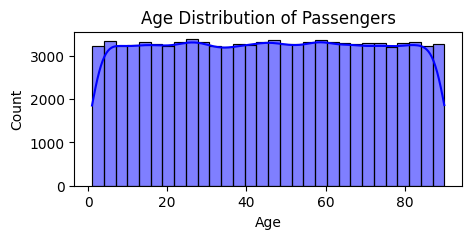

In [60]:
plt.figure(figsize=(5, 2))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Passenger numbers are evenly distributed across ages 1 to 99, so grouping the data is necessary to highlight overall demographic patterns.

In [61]:
def cat_age (string):
    # string=int(string)
    if str(string) == 'nan':
        return 'Unknown'
    elif int(string) <= 10:
        return 'Children'
    
    elif 11 <= int(string) <= 18:
        return 'Teen'
    
    elif 19 <= int(string) <= 55:
        return 'Adults'
    
    elif int(string) > 55:
        return 'Seniors'

In [62]:
df['age_group']=df['age'].apply(cat_age)
df['age_group'].value_counts()

age_group
Adults      40597
Seniors     38376
Children    10896
Teen         8750
Name: count, dtype: int64

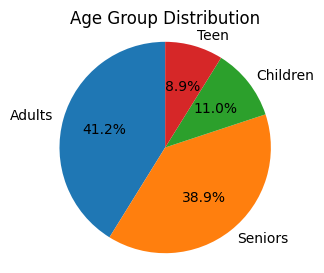

In [63]:
# Visualize age group distribution
import matplotlib.pyplot as plt

age_group_count = df['age_group'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(
    age_group_count.values,
    labels=age_group_count.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Age Group Distribution')
plt.axis('equal')

plt.show()


The passenger population is dominated by adults (41.2%) and seniors (38.9%), while children (11.0%) and teens (8.9%) make up much smaller shares.

**Gender distribution:**

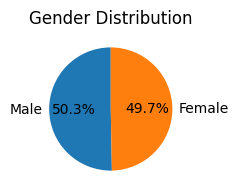

In [64]:
import matplotlib.pyplot as plt

gender_counts = df["gender"].value_counts()

plt.figure(figsize=(2, 2))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Gender Distribution")
plt.show()


The gender distribution is highly balanced, with males accounting for 50.2% and females 49.7% of passengers, indicating no gender bias in the dataset.

## 2. Geographic patterns (Where do they come from?)

**Nationality & Continents:**

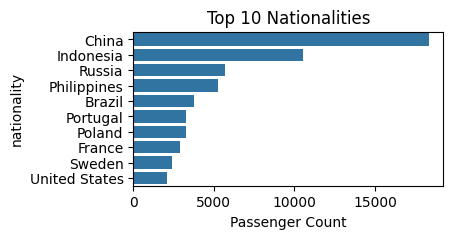

In [65]:
top_nat = df["nationality"].value_counts().head(10)

plt.figure(figsize=(4, 2))
sns.barplot(
    x=top_nat.values,
    y=top_nat.index
)
plt.title("Top 10 Nationalities")
plt.xlabel("Passenger Count")
plt.ylabel("nationality")
plt.show()



China accounts for the largest share of passengers, with a count nearly double that of Indonesia and multiple times higher than any other nationality in the top 10.

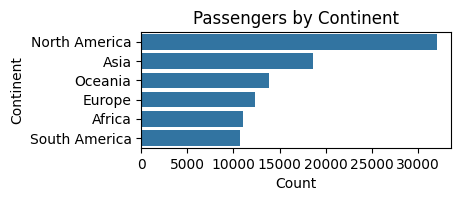

In [66]:
continent_order = df["continents"].value_counts().index

plt.figure(figsize=(4, 1.5))
sns.countplot(
    y="continents",
    data=df,
    order=continent_order
)
plt.title("Passengers by Continent")
plt.xlabel("Count")
plt.ylabel("Continent")
plt.show()


North America is the leading continent in terms of passenger volume, with nearly twice as many passengers as other continents, indicating it is the most significant regional market in the dataset.

## 3. Airport & route analysis (Where do they fly?)

**Busiest airports:**

In [67]:
print("Top 10 Airports by Number of Flights:")
df["airport_name"].value_counts().head(10)

Top 10 Airports by Number of Flights:


airport_name
San Pedro Airport       43
Santa Maria Airport     38
Böblingen Flugfeld      36
Santa Ana Airport       35
San Fernando Airport    31
Mae Hong Son Airport    29
Santa Rosa Airport      28
Capital City Airport    28
Cochrane Airport        28
Bathurst Airport        27
Name: count, dtype: int64

In [68]:
df['arrival_airport']

0        CXF
1        YCO
2        GNB
3        YND
4        SEE
        ... 
98614    HAA
98615    IVA
98616    ABC
98617    GGN
98618    JOK
Name: arrival_airport, Length: 98619, dtype: object

Arrival Airport locations are represented using IATA airport codes, which are standardized three-letter identifiers used in the aviation industry.

In [69]:
# Mapping Airport Codes to Country Names

# 1. Load dữ liệu OurAirports (online)
airports_url = "https://ourairports.com/data/airports.csv"
countries_url = "https://ourairports.com/data/countries.csv"

airports = pd.read_csv(airports_url)
countries = pd.read_csv(countries_url)

# 2. Chuẩn hóa dữ liệu country
country_map = countries.set_index("code")["name"]

# 3. Tạo mapping Airport -> Country Name
airport_country_map = (
    airports
    .dropna(subset=["iata_code"])
    .assign(country_name=lambda x: x["iso_country"].map(country_map))
    .set_index("iata_code")["country_name"]
)

# 4. Chuẩn hóa airport code trong dataframe
df["arrival_airport"] = (
    df["arrival_airport"]
    .astype(str)
    .str.strip()
    .str.upper()
)

# 5. Map vào DataFrame
df["arrival_country"] = df["arrival_airport"].map(airport_country_map)

# 6. xử lý airport không map được
df["arrival_country"].fillna("Unknown", inplace=True)

# 7. Kiểm tra kết quả
print(df[["arrival_airport", "arrival_country"]].head(10))

  arrival_airport arrival_country
0             CXF   United States
1             YCO          Canada
2             GNB          France
3             YND          Canada
4             SEE   United States
5             LEC          Brazil
6             QFO         Unknown
7             STM          Brazil
8             VCE           Italy
9             YVG          Canada


In [70]:
df['arrival_country'].value_counts()

arrival_country
United States              21287
Australia                   6265
Unknown                     5804
Canada                      5172
Papua New Guinea            3614
                           ...  
Cocos (Keeling) Islands        8
Nauru                          7
Monaco                         7
Palau                          5
Jersey                         4
Name: count, Length: 234, dtype: int64

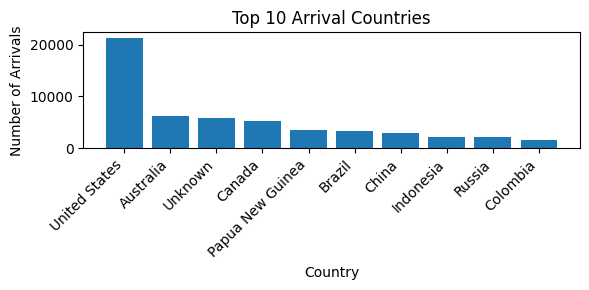

In [71]:
# Visualize Top 10 Arrival Countries
top10 = df['arrival_country'].value_counts().head(10)

plt.figure(figsize=(6, 3))
plt.bar(top10.index, top10.values)
plt.title('Top 10 Arrival Countries')
plt.xlabel('Country')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


**The United States** receives the highest number of arriving passengers, with a figure more than **three times higher** than that of the second-ranked country, **Australia**.

## 4. Time-based analysis (When do people travel?)

**Travel volume over time:**

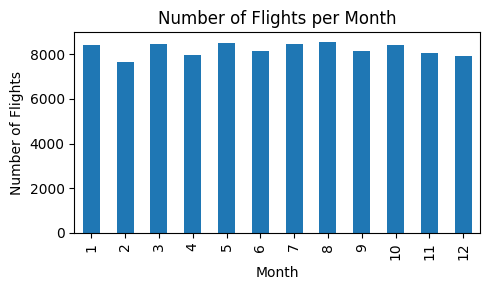

In [72]:
# Visualize Number of Flights per Month
plt.figure(figsize=(5, 3))

df.groupby(df["departure_date"].dt.month).size().plot(
    kind="bar",
    title="Number of Flights per Month"
)

plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.tight_layout()
plt.show()


The monthly distribution of flights shows relatively stable travel activity throughout the year, with no extreme seasonal spikes.

## 5. Operational performance (How well does the airline operate?)

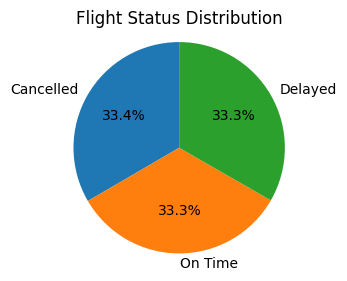

In [73]:
# Visualize Flight Status Distribution
status_counts = df['flight_status'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Flight Status Distribution')
plt.axis('equal')

plt.show()


In [74]:
# Flight Status by Continents
df1 = df.pivot_table(index='continents', columns='flight_status', aggfunc='count', values='age')
df1.style.bar()

flight_status,Cancelled,Delayed,On Time
continents,,,
Africa,3657,3654,3719
Asia,6235,6160,6242
Europe,4095,4178,4062
North America,10693,10696,10644
Oceania,4619,4634,4613
South America,3643,3509,3566


A high proportion of problem flights (68%) is observed. However, unlike real-world airline data—where on-time flights typically dominate—the balanced status distribution indicates limited realism, reducing the usefulness of this metric for operational decision-making.

## 6. Relationships between variables

1. Airport vs delays

In [76]:
df.groupby('airport_name')['flight_status'] \
  .value_counts(normalize=True) \
  .unstack()

flight_status,Cancelled,Delayed,On Time
airport_name,,,
28 de Noviembre Airport,0.250000,0.312500,0.437500
9 de Maio - Teixeira de Freitas Airport,0.200000,0.400000,0.400000
A Coruña Airport,0.454545,0.181818,0.363636
A L Mangham Jr. Regional Airport,0.272727,0.272727,0.454545
A P Hill AAF (Fort A P Hill) Airport,0.333333,0.250000,0.416667
...,...,...,...
Şanlıurfa GAP Airport,0.500000,0.375000,0.125000
Şırnak Şerafettin Elçi Airport,0.363636,0.272727,0.363636
Šiauliai International Airport,0.363636,0.272727,0.363636


In [77]:
# Top 10 Problematic Airports
problem_status = ['Delayed', 'Cancelled']

airport_volume = (
    df.groupby('airport_name')
      .size()
)
MIN_FLIGHTS = airport_volume.median() #avoiding airports with very few flights

airport_stats = (
    df.groupby('airport_name')
      .agg(
          total_flights=('flight_status', 'count'),
          problem_flights=('flight_status', lambda x: x.isin(problem_status).sum())
      )
)

airport_stats['problem_rate'] = (
    airport_stats['problem_flights'] / airport_stats['total_flights']
)
airport_stats_filtered = airport_stats[
    airport_stats['total_flights'] >= MIN_FLIGHTS
]
top_problem_airports = (
    airport_stats_filtered
    .sort_values('problem_rate', ascending=False)
    .head(10)
)

top_problem_airports


,total_flights,problem_flights,problem_rate
airport_name,,,
Buka Airport,17,17,1.0
Maimun Saleh Airport,13,13,1.0
Carutapera Airport,13,13,1.0
Pamplona Airport,11,11,1.0
Tau Airport,12,12,1.0
Shaikh Zaid Airport,13,13,1.0
Sudbury Airport,12,12,1.0
Cabo F.A.A. H. R. Bordón Airport,11,11,1.0
Mwanza Airport,11,11,1.0


Because multiple airports share the same maximum problem rate, ranking the “top 10” would be arbitrary. Instead, I present all airports with the highest rate and apply a volume constraint to ensure the results reflect consistent operational issues rather than small-sample noise.

<Axes: title={'center': 'Airport Volume vs Problem Rate'}, xlabel='total_flights', ylabel='problem_rate'>

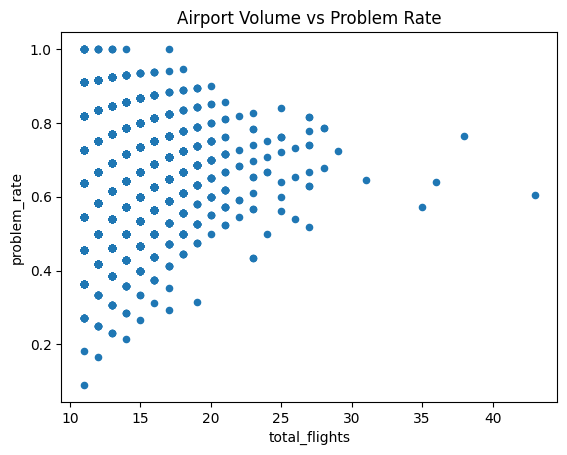

In [78]:
# Visualize Airport Volume vs Problem Rate
airport_stats_filtered.plot(
    kind='scatter',
    x='total_flights',
    y='problem_rate',
    title='Airport Volume vs Problem Rate'
)


This chart shows that while small airports often exhibit extreme problem rates due to low volume, the most critical operational issues occur at high-traffic airports with consistently high delay and cancellation rates.

In [79]:
# Identify Airports Needing Improvement
volume_cutoff = airport_stats_filtered['total_flights'].median()
problem_cutoff = 0.8 # Adjusted cutoff for problem rate

needs_improvement = airport_stats_filtered[
    (airport_stats_filtered['total_flights'] >= volume_cutoff) &
    (airport_stats_filtered['problem_rate'] >= problem_cutoff)
]

needs_improvement.sort_values(
    ['problem_rate', 'total_flights'],
    ascending=False
)


,total_flights,problem_flights,problem_rate
airport_name,,,
Buka Airport,17,17,1.0
Førde Airport,14,14,1.0
Carutapera Airport,13,13,1.0
Maimun Saleh Airport,13,13,1.0
Shaikh Zaid Airport,13,13,1.0
...,...,...,...
Viveros Island Airport,15,12,0.8
Wainwright Airport,15,12,0.8
Wangaratta Airport,15,12,0.8


2. Nationality × Arrival Country

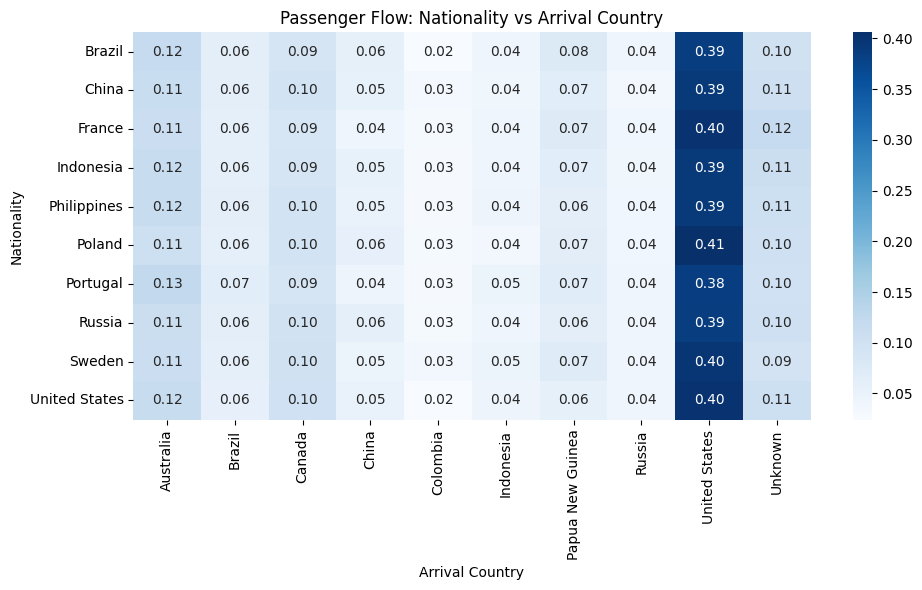

In [80]:
# Visualize Passenger Flow: Nationality vs Arrival Country
top_nationalities = df['nationality'].value_counts().head(10).index
top_arrival_countries = df['arrival_country'].value_counts().head(10).index

flow_df = df[
    df['nationality'].isin(top_nationalities) &
    df['arrival_country'].isin(top_arrival_countries)
]
flow_table = pd.crosstab(
    flow_df['nationality'],
    flow_df['arrival_country'],
    normalize='index'
)
plt.figure(figsize=(10, 6))
sns.heatmap(flow_table, annot=True, fmt=".2f", cmap="Blues")

plt.title("Passenger Flow: Nationality vs Arrival Country")
plt.xlabel("Arrival Country")
plt.ylabel("Nationality")
plt.tight_layout()
plt.show()


**The United States** is the dominant arrival country across almost all nationalities, accounting for roughly **38–41%** of passenger arrivals, far higher than any other destination. Other countries (Australia, Canada, Brazil, China) each capture much smaller and fairly similar shares, indicating a diversified but secondary flow. Overall, passenger movement is strongly concentrated toward the U.S., suggesting it is the key hub to prioritize for capacity planning, immigration processing, and service optimization.

In [81]:
# Top Nationality to United States
top_destination_by_nationality = (
    flow_df.groupby('nationality')['arrival_country']
           .value_counts()
           .groupby(level=0)
           .head(1)
           .reset_index(name='count')
           .sort_values('count', ascending=False)
)

top_nationality_to_US = top_destination_by_nationality.head(10)
top_nationality_to_US


,nationality,arrival_country,count
1,China,United States,3907
3,Indonesia,United States,2286
7,Russia,United States,1189
4,Philippines,United States,1142
0,Brazil,United States,806
5,Poland,United States,717
6,Portugal,United States,703
2,France,United States,642
8,Sweden,United States,524
9,United States,United States,471


In [82]:
# Calculate Entropy of Passenger Flow Distribution
from scipy.stats import entropy
flow_table.apply(lambda x: entropy(x), axis=1)

nationality
Brazil           1.956509
China            1.950121
France           1.926698
Indonesia        1.947204
Philippines      1.946345
Poland           1.926829
Portugal         1.959431
Russia           1.967068
Sweden           1.952866
United States    1.925221
dtype: float64

- Entropy values are very similar (~1.92–1.97) across all nationalities → arrival destinations are well distributed.
- Russia and Portugal are the most diversified; the US, France, and Poland are slightly more concentrated.
- No nationality depends on a single destination.
- The US is often the top destination, but travel flows remain broad and balanced overall.

# 6. Feature Engineering (K_Means)

Segment passengers into distinct groups based on demographic and geographic characteristics to support targeted service strategies.

Step 1: Create meaningful features

In [83]:
# 1.1 Convert Departure_Date to datetime
df["departure_date"] = pd.to_datetime(df["departure_date"])
df["travel_month"] = df["departure_date"].dt.month

# 1.2 Passenger travel frequency
passenger_freq = df.groupby("passenger_id").size().rename("travel_frequency")
df = df.merge(passenger_freq, on="passenger_id", how="left")


Step 2: Select features for clustering

In [84]:
features = [
    "age_group",
    "gender",
    "nationality",
    "country_name",
    "travel_month",
    "travel_frequency"
]

df_seg = df[features].copy()


Step 3: Handle missing values

In [85]:
categorical_cols = ["age_group", "gender", "nationality", "country_name"]
numeric_cols = ["travel_month", "travel_frequency"]

df_seg[categorical_cols] = df_seg[categorical_cols].fillna("Unknown")
df_seg[numeric_cols] = df_seg[numeric_cols].fillna(df_seg[numeric_cols].median())


Step 4: Encode categorical variables

In [86]:
df_encoded = pd.get_dummies(
    df_seg,
    columns=categorical_cols,
    drop_first=True
)


Step 5: Scale features

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)


Step 6: Find optimal number of clusters (K)

6.1 Elbow Method

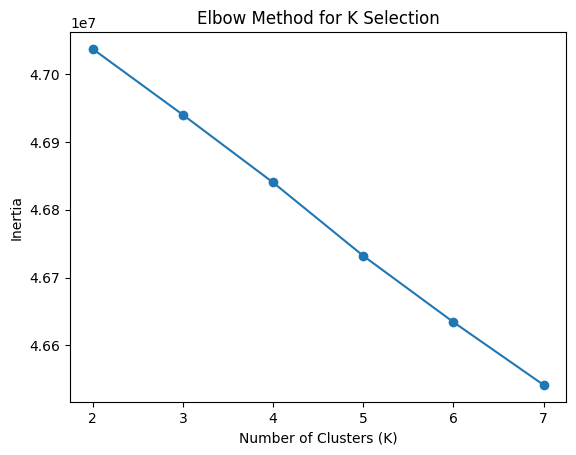

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K Selection")
plt.show()


Elbow method alone is insufficient for choosing K in this dataset.

6.2 Silhouette Score

In [89]:
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


K=2, Silhouette Score=0.007
K=3, Silhouette Score=-0.067
K=4, Silhouette Score=-0.120
K=5, Silhouette Score=-0.081


Silhouette analysis identified **K = 2** as the optimal number of clusters, achieving the highest (though still low) silhouette score among tested values. This indicates minimal natural separation in the data, suggesting passenger attributes are relatively homogeneous.

Step 7: Train final K-Means model (K=2)

In [90]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["customer_segment"] = kmeans.fit_predict(X_scaled)


Step 8: Profile each segment

In [91]:
segment_profile = df.groupby("customer_segment").agg(
    Avg_Travel_Frequency=("travel_frequency", "mean"),
    Dominant_Age_Group=("age_group", lambda x: x.value_counts().idxmax()),
    Dominant_Nationality=("nationality", lambda x: x.value_counts().idxmax()),
    Top_Destination_Country=("country_name", lambda x: x.value_counts().idxmax()),
    Passenger_Count=("passenger_id", "nunique")
)

segment_profile


,Avg_Travel_Frequency,Dominant_Age_Group,Dominant_Nationality,Top_Destination_Country,Passenger_Count
customer_segment,,,,,
0,1.0,Seniors,China,United States,47736
1,1.0,Adults,China,United States,50883


The K-Means model identified two passenger segments with very similar travel behavior, reflected by the same average travel frequency (1 trip per passenger).

Both segments are dominated by Chinese nationality and share the same top destination (United States), indicating a highly concentrated passenger flow rather than distinct behavioral groups.

The primary differentiator between segments is age composition:

- Segment 0 is dominated by Seniors

- Segment 1 is dominated by Adults

Passenger volumes are relatively balanced across segments (≈47.7K vs ≈50.9K), suggesting no strong skew toward a single group.

# 7. Save Clear Data Into Database To Visiualization

In [92]:
import pyodbc

# --- Connect ---
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost\SQLEXPRESS;"
    "DATABASE=projects;"
    "Trusted_Connection=yes;"
    "TrustServerCertificate=yes;"
)
cursor = conn.cursor()

def dtype_map(dt):
    if pd.api.types.is_integer_dtype(dt):
        return "INT"
    elif pd.api.types.is_float_dtype(dt):
        return "DECIMAL(18,6)"   
    elif pd.api.types.is_bool_dtype(dt):
        return "BIT"
    elif pd.api.types.is_datetime64_any_dtype(dt):
        return "DATETIME"
    else:
        return "VARCHAR(MAX)" 


table_name = "Mock_Project_EDA" 

# --- Drop + Create table ---
cursor.execute(f"IF OBJECT_ID('dbo.{table_name}', 'U') IS NOT NULL DROP TABLE dbo.{table_name}")
cols = ", ".join([f"[{c}] {dtype_map(df[c].dtype)}" for c in df.columns]) #
cursor.execute(f"CREATE TABLE dbo.{table_name} ({cols})")


# --- Insert rows ---
cursor.fast_executemany = True
cursor.executemany(f"INSERT INTO dbo.{table_name} VALUES ({','.join(['?']*len(df.columns))})", df.values.tolist()) #
conn.commit()

<>:6: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:6: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
C:\Users\Hiep\AppData\Local\Temp\ipykernel_20992\2711176368.py:6: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
  "SERVER=localhost\SQLEXPRESS;"
